## Business Problem

Market Basket Analysis is a key method in data science that aims to identify meaningful associations or relationships between items purchased together in a transaction. This technique is particularly useful in the retail industry for recommending products, optimizing promotions, and increasing sales. The central problem we aim to solve is: how to efficiently identify significant patterns from complex transactions while ensuring the chosen algorithm performs well on large datasets.


## What is the Association Rule Learning ?

To address this problem, we leverage the method of association rule mining, a type of unsupervised learning. Association rules discover relationships in the form of if A, then B, where A and B represent items or itemsets. The key metrics used to evaluate these rules are support, confidence, and lift, which measure frequency, conditional probability, and statistical significance, respectively.


## Exploratory Data Analysis

In [8]:
import pandas as pd
import warnings

data= pd.read_csv('data_externe/Groceries_dataset2.csv')
data.head(10)

Member_number        Date   itemDescription
0           1808  21/07/2015    tropical fruit
1           2552  05/01/2015        whole milk
2           2300  19/09/2015         pip fruit
3           1187  12/12/2015  other vegetables
4           3037  01/02/2015        whole milk
5           4941  14/02/2015        rolls/buns
6           4501  08/05/2015  other vegetables
7           3803  23/12/2015        pot plants
8           2762  20/03/2015        whole milk
9           2901  20/03/2015               NaN

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38772 entries, 0 to 38771
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38772 non-null  int64 
 1   Date             38772 non-null  object
 2   itemDescription  38752 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.8+ KB


In [10]:
data.describe()

Member_number
count   38772.000000
mean     3003.876277
std      1153.973103
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4008.000000
max      6989.000000

In [11]:
print(data.dtypes)

Member_number       int64
Date               object
itemDescription    object
dtype: object


In [12]:
print(data.shape)

(38772, 3)


## Data Visualization

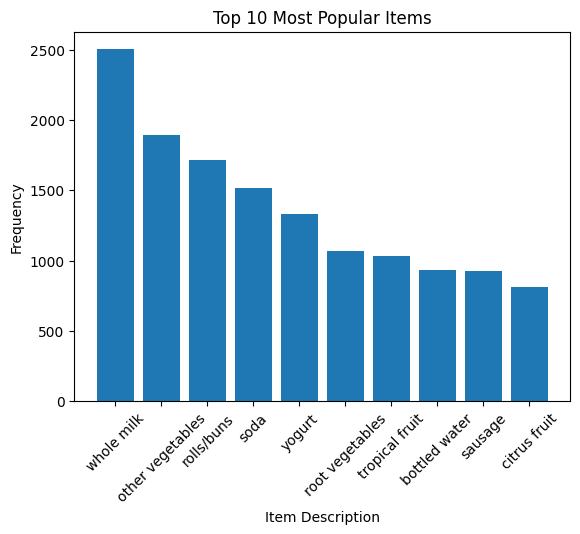

In [13]:
import matplotlib.pyplot as plt

# plot most frequent items in dataset
item_counts = data['itemDescription'].value_counts()
plt.bar(item_counts.index[:10], item_counts.values[:10])
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=45)
plt.show()
warnings.filterwarnings('ignore')

Member_number       0
Date                0
itemDescription    20
dtype: int64


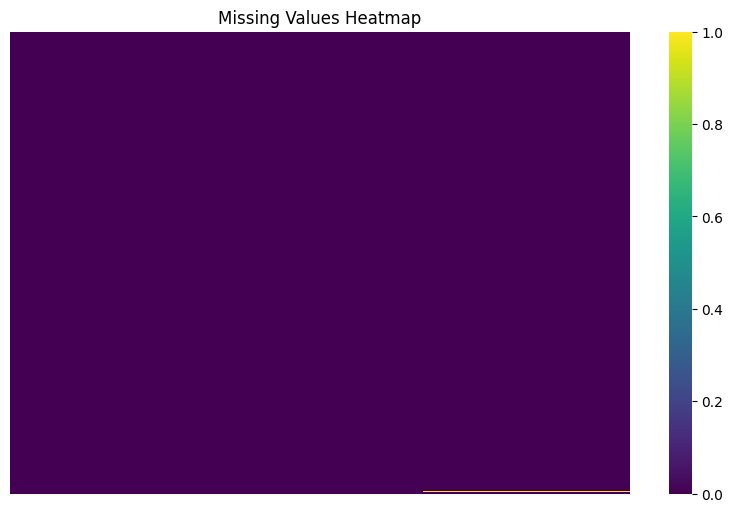

In [14]:
import seaborn as sns

print(data.isnull().sum())
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis')
plt.title("Missing Values Heatmap")

plt.axis("off")
plt.show() 


## Cleaning Data 

In [15]:
# Supprimer les lignes avec des valeurs manquantes
print(f"Lignes restantes avant suppression des valeurs manquantes : {len(data)}")
data2 = data.dropna()
print(f"Lignes restantes après suppression des valeurs manquantes : {len(data2)}")

Lignes restantes avant suppression des valeurs manquantes : 38772
Lignes restantes après suppression des valeurs manquantes : 38752


In [16]:
# Nettoyer les colonnes textuelles (tous en minisculle)
data2['itemDescription'] = data2['itemDescription'].str.lower().str.strip()
print("Exemple de descriptions après nettoyage :")
print(data2['itemDescription'].head())

Exemple de descriptions après nettoyage :
0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object


In [17]:
# Supprimer les doublons
print(f"Lignes restantes avant suppression des doublons : {len(data2)}")
data3=data2.drop_duplicates()
print(f"Lignes restantes après suppression des doublons : {len(data3)}")

Lignes restantes avant suppression des doublons : 38752
Lignes restantes après suppression des doublons : 37995


In [18]:
# Enregistrer les données nettoyées dans un fichier Excel
cleaned_file_path = "Cleaned_Groceries_dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"Données nettoyées enregistrées dans : {cleaned_file_path}\n")

Données nettoyées enregistrées dans : Cleaned_Groceries_dataset.csv



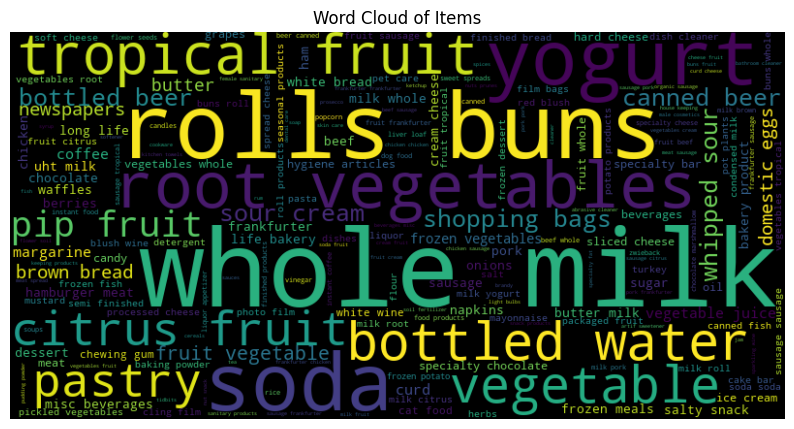

In [19]:
from wordcloud import WordCloud

# Word Cloud
text = " ".join(review for review in data3['itemDescription'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Word Cloud of Items")

plt.axis("off")
plt.show() 


In [20]:
# Prétraitement: Grouper les articles par chaque transaction
transactions = data3.groupby('Member_number')['itemDescription'].apply(list)
transactions

Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
                              ...                        
4996    [dessert, salty snack, rolls/buns, misc. bever...
4997    [tropical fruit, white wine, whole milk, curd,...
4998                                   [rolls/buns, curd]
4999    [bottled water, butter milk, tropical fruit, b...
5000    [soda, bottled beer, fruit/vegetable juice, ro...
Name: itemDescription, Length: 3898, dtype: object

In [21]:
# Convertir les transactions au format One-Hot Encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print (df_encoded.shape)
df_encoded.head()

(3898, 167)


abrasive cleaner  artif. sweetener  baby cosmetics   bags  baking powder  \
0             False             False           False  False          False   
1             False             False           False  False          False   
2             False             False           False  False          False   
3             False             False           False  False          False   
4             False             False           False  False          False   

   bathroom cleaner   beef  berries  beverages  bottled beer  ...  uht-milk  \
0             False  False    False      False         False  ...     False   
1             False   True    False      False         False  ...     False   
2             False  False    False      False         False  ...     False   
3             False  False    False      False         False  ...     False   
4             False  False    False      False         False  ...     False   

   vinegar  waffles  whipped/sour cream  whisky  white bread  white wine  \
0    False    False               False   False        False       False   
1    False    False                True   False         True       False   
2    False    False               False   False        False       False   
3    False    False               False   False        False       False   
4    False    False               False   False        False       False   

   whole milk  yogurt  zwieback  
0        True    True     False  
1        True   False     False  
2        True   False     False  
3       False   False     False  
4        True   False     False  

[5 rows x 167 columns]

In [22]:
from sklearn.model_selection import train_test_split

# Randomly split the new data into training and test sets
train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=42)

print("Training 1 data:")
print(train_data.shape)

print("Test data:")
print(test_data.shape)
train_data.to_csv('data/train_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)

Training 1 data:
(3118, 167)
Test data:
(780, 167)


In [23]:
train_data

abrasive cleaner  artif. sweetener  baby cosmetics   bags  \
2329             False             False           False  False   
2769             False             False           False  False   
1866             False             False           False  False   
1222             False             False           False  False   
650              False             False           False  False   
...                ...               ...             ...    ...   
1130             False             False           False  False   
1294             False             False           False  False   
860              False             False           False  False   
3507             False             False           False  False   
3174             False             False           False  False   

      baking powder  bathroom cleaner   beef  berries  beverages  \
2329          False             False  False    False      False   
2769          False             False   True    False      False   
1866          False             False  False    False      False   
1222          False             False  False    False      False   
650           False             False  False    False      False   
...             ...               ...    ...      ...        ...   
1130          False             False  False    False      False   
1294          False              True  False    False       True   
860           False             False  False    False      False   
3507          False             False  False    False      False   
3174          False             False  False    False      False   

      bottled beer  ...  uht-milk  vinegar  waffles  whipped/sour cream  \
2329          True  ...     False    False    False                True   
2769         False  ...     False    False    False               False   
1866         False  ...     False    False    False               False   
1222         False  ...     False    False    False               False   
650          False  ...     False    False    False               False   
...            ...  ...       ...      ...      ...                 ...   
1130         False  ...     False    False    False               False   
1294         False  ...     False    False    False               False   
860          False  ...     False    False    False               False   
3507         False  ...     False    False    False               False   
3174         False  ...     False    False    False                True   

      whisky  white bread  white wine  whole milk  yogurt  zwieback  
2329   False         True       False       False   False     False  
2769   False         True       False        True   False     False  
1866   False        False       False       False    True     False  
1222   False        False       False       False    True     False  
650    False        False       False       False   False     False  
...      ...          ...         ...         ...     ...       ...  
1130   False        False       False       False   False     False  
1294   False        False       False       False   False     False  
860    False        False       False       False   False     False  
3507   False        False       False       False    True     False  
3174   False        False       False        True   False     False  

[3118 rows x 167 columns]

In [24]:
test_data.head()

abrasive cleaner  artif. sweetener  baby cosmetics   bags  \
3685             False             False           False  False   
912              False             False           False  False   
321              False             False           False  False   
2098             False             False           False  False   
1480             False             False           False  False   

      baking powder  bathroom cleaner   beef  berries  beverages  \
3685          False             False  False    False      False   
912           False             False  False    False      False   
321           False             False  False    False      False   
2098          False             False  False    False      False   
1480          False             False  False    False      False   

      bottled beer  ...  uht-milk  vinegar  waffles  whipped/sour cream  \
3685         False  ...     False    False     True               False   
912          False  ...     False    False    False               False   
321          False  ...     False    False    False                True   
2098          True  ...     False    False    False               False   
1480         False  ...     False    False    False               False   

      whisky  white bread  white wine  whole milk  yogurt  zwieback  
3685   False        False       False       False   False     False  
912    False        False       False        True    True     False  
321    False        False       False       False   False     False  
2098   False        False       False       False   False     False  
1480   False        False       False        True   False     False  

[5 rows x 167 columns]

# training phase

## Setting Parameters 

In [25]:
# Support
min_support=0.01
# Confidence
min_confidence=0.5
# Lift
min_lift=0.5

## APRIORI Alogithm

In [26]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets : support
frequent_itemsets_apriori = apriori(train_data, min_support=min_support, use_colnames=True)
print("frequent_itemsets :" )
frequent_itemsets_apriori

frequent_itemsets :


support                                           itemsets
0     0.033034                                    (baking powder)
1     0.120269                                             (beef)
2     0.076331                                          (berries)
3     0.065427                                        (beverages)
4     0.158114                                     (bottled beer)
...        ...                                                ...
2943  0.014753         (tropical fruit, whole milk, soda, yogurt)
2944  0.010904     (whipped/sour cream, whole milk, soda, yogurt)
2945  0.013791  (yogurt, whole milk, other vegetables, rolls/b...
2946  0.013470  (yogurt, soda, whole milk, other vegetables, r...
2947  0.010904  (yogurt, whole milk, tropical fruit, other veg...

[2948 rows x 2 columns]

In [27]:
# Generate association rules
rules = association_rules(frequent_itemsets_apriori, metric='confidence', min_threshold=min_confidence ,num_itemsets=2)
print(f"Nombre total de règles générées: {len(rules)}")
rules.head()

Nombre total de règles générées: 1064


antecedents         consequents  antecedent support  \
0  (baking powder)  (other vegetables)            0.033034   
1           (beef)        (whole milk)            0.120269   
2   (bottled beer)        (whole milk)            0.158114   
3  (bottled water)        (whole milk)            0.215202   
4    (brown bread)        (whole milk)            0.135343   

   consequent support   support  confidence      lift  representativity  \
0            0.375561  0.016677    0.504854  1.344266               1.0   
1            0.459269  0.067030    0.557333  1.213523               1.0   
2            0.459269  0.082104    0.519270  1.130645               1.0   
3            0.459269  0.112893    0.524590  1.142229               1.0   
4            0.459269  0.069275    0.511848  1.114485               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.004271    1.261121       0.264849  0.042553   0.207055    0.274630  
1  0.011794    1.221531       0.200008  0.130788   0.181355    0.351642  
2  0.009487    1.124812       0.137250  0.153385   0.110963    0.349020  
3  0.014057    1.137400       0.158664  0.201028   0.120802    0.385200  
4  0.007116    1.107712       0.118804  0.131868   0.097238    0.331343

In [28]:
# Apply frequent itemsets to the test data
frequent_itemsets_test = apriori(test_data, min_support=min_support, use_colnames=True)

# Generate association rules on the test frequent itemsets
rules_test = association_rules(frequent_itemsets_test, metric='confidence', min_threshold=1,num_itemsets=2)

print(f"Number of rules in the test dataset: {len(rules_test)}")
rules_test.head()


Number of rules in the test dataset: 54


antecedents   consequents  antecedent support  \
0        (citrus fruit, chewing gum)  (whole milk)            0.010256   
1      (shopping bags, frozen meals)  (whole milk)            0.010256   
2            (spread cheese, pastry)  (whole milk)            0.011538   
3                (white bread, pork)  (whole milk)            0.014103   
4  (berries, bottled water, sausage)  (whole milk)            0.010256   

   consequent support   support  confidence     lift  representativity  \
0            0.453846  0.010256         1.0  2.20339               1.0   
1            0.453846  0.010256         1.0  2.20339               1.0   
2            0.453846  0.011538         1.0  2.20339               1.0   
3            0.453846  0.014103         1.0  2.20339               1.0   
4            0.453846  0.010256         1.0  2.20339               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.005602         inf       0.551813  0.022599        1.0    0.511299  
1  0.005602         inf       0.551813  0.022599        1.0    0.511299  
2  0.006302         inf       0.552529  0.025424        1.0    0.512712  
3  0.007702         inf       0.553966  0.031073        1.0    0.515537  
4  0.005602         inf       0.551813  0.022599        1.0    0.511299

In [29]:
# Merge training and test rules for comparison
validation_df = rules.merge(
    rules_test, 
    on=['antecedents', 'consequents'], 
    suffixes=('_train', '_test')
)

# Check consistency of metrics
validation_df[['support_train', 'support_test', 'confidence_train', 'confidence_test', 'lift_train', 'lift_test']]


Empty DataFrame
Columns: [support_train, support_test, confidence_train, confidence_test, lift_train, lift_test]
Index: []

In [30]:
new_transaction = frozenset(['whole milk'])

# Check which rules apply
applicable_rules = rules[rules['antecedents'] == new_transaction]

# Recommend items from the consequents
recommendations = applicable_rules['consequents'].head()
print(f"Recommended items: {recommendations}")


Recommended items: Series([], Name: consequents, dtype: object)


## FP-GROWTH Algorithm

In [54]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder


# 5. Appliquer FP-Growth pour extraire les ensembles fréquents
frequent_itemsets_fpGrowth = fpgrowth(train_data, min_support=min_support, use_colnames=True)

# Afficher les 5 premiers itemsets fréquents
print("### Étape 4: Extraction des Itemsets Fréquents avec FP-Growth")
frequent_itemsets_fpGrowth

### Étape 4: Extraction des Itemsets Fréquents avec FP-Growth


support                    itemsets
0     0.186979              (citrus fruit)
1     0.158114              (bottled beer)
2     0.158114        (whipped/sour cream)
3     0.121232                      (curd)
4     0.091405               (white bread)
...        ...                         ...
2943  0.016357        (whole milk, liquor)
2944  0.011225              (soda, liquor)
2945  0.010904        (rolls/buns, liquor)
2946  0.010584            (yogurt, liquor)
2947  0.013149  (other vegetables, liquor)

[2948 rows x 2 columns]

In [55]:
rules = association_rules(frequent_itemsets_fpGrowth, metric='confidence', min_threshold=min_confidence ,num_itemsets=2)
print(f"Nombre total de règles générées: {len(rules)}")
rules.head()

Nombre total de règles générées: 1064


antecedents         consequents  \
0        (citrus fruit, soda, whole milk)  (other vegetables)   
1  (other vegetables, citrus fruit, soda)        (whole milk)   
2                 (citrus fruit, sausage)  (other vegetables)   
3                 (citrus fruit, sausage)        (whole milk)   
4         (citrus fruit, yogurt, sausage)        (whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.032713            0.375561  0.016357    0.500000  1.331341   
1            0.029185            0.459269  0.016357    0.560440  1.220287   
2            0.041052            0.375561  0.024054    0.585938  1.560165   
3            0.041052            0.459269  0.021488    0.523438  1.139719   
4            0.016998            0.459269  0.010584    0.622642  1.355724   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.004071    1.248877       0.257294  0.041735   0.199281   
1               1.0  0.002953    1.230164       0.185947  0.034647   0.187100   
2               1.0  0.008636    1.508078       0.374412  0.061275   0.336905   
3               1.0  0.002634    1.134649       0.127839  0.044876   0.118670   
4               1.0  0.002777    1.432938       0.266924  0.022727   0.302133   

   kulczynski  
0    0.271776  
1    0.298027  
2    0.324993  
3    0.285113  
4    0.322843

In [56]:
rules[rules['lift'] > 1].head()
# rules=association_rules(frequent_itemsets_apriori, metric='lift', min_threshold=min_lift ,num_itemsets=2)
# rules

antecedents         consequents  \
0        (citrus fruit, soda, whole milk)  (other vegetables)   
1  (other vegetables, citrus fruit, soda)        (whole milk)   
2                 (citrus fruit, sausage)  (other vegetables)   
3                 (citrus fruit, sausage)        (whole milk)   
4         (citrus fruit, yogurt, sausage)        (whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.032713            0.375561  0.016357    0.500000  1.331341   
1            0.029185            0.459269  0.016357    0.560440  1.220287   
2            0.041052            0.375561  0.024054    0.585938  1.560165   
3            0.041052            0.459269  0.021488    0.523438  1.139719   
4            0.016998            0.459269  0.010584    0.622642  1.355724   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.004071    1.248877       0.257294  0.041735   0.199281   
1               1.0  0.002953    1.230164       0.185947  0.034647   0.187100   
2               1.0  0.008636    1.508078       0.374412  0.061275   0.336905   
3               1.0  0.002634    1.134649       0.127839  0.044876   0.118670   
4               1.0  0.002777    1.432938       0.266924  0.022727   0.302133   

   kulczynski  
0    0.271776  
1    0.298027  
2    0.324993  
3    0.285113  
4    0.322843

## ECLAT Algorithm

In [38]:
# !pip install pyECLAT

In [39]:
import numpy as np
from pyECLAT import ECLAT


# Extraire les valeurs uniques de la colonne 'itemDescription'
unique_values = data3['itemDescription'].count()

# Afficher les valeurs uniques
print("Valeurs uniques dans 'itemDescription' :")
print(unique_values)

# Regrouper les itemdescription par member_number et date
grouped_df3= data3.groupby(['Member_number'])['itemDescription'].apply(list).reset_index()
# Renommer les colonnes
grouped_df3.columns = ['Member_number', 'items_grouped']

# Afficher le résultat du regroupement
print("\nAperçu des données regroupées :")
print(grouped_df3.head())

grouped_df3.to_csv('data/grouped_df3.csv', index=False)


df_trans_with_name = train_data.copy()

# Étape 4 : Remplacer True par le nom de la colonne et False par NaN
for col in train_data.columns:
    df_trans_with_name[col] = df_encoded[col].apply(lambda x: col if x else np.nan)


df_trans_with_name.to_csv('data/transaction_with_name.csv', index=False)
print(df_trans_with_name)
  # jusqu'un maintenat tous esttttttttttttttt biiiiiiiiiiiiiiiiiien 

Valeurs uniques dans 'itemDescription' :
37995

Aperçu des données regroupées :
   Member_number                                      items_grouped
0           1000  [soda, canned beer, sausage, sausage, whole mi...
1           1001  [frankfurter, frankfurter, beef, sausage, whol...
2           1002  [tropical fruit, butter milk, butter, frozen v...
3           1003  [sausage, root vegetables, rolls/buns, deterge...
4           1004  [other vegetables, pip fruit, root vegetables,...
     abrasive cleaner artif. sweetener baby cosmetics bags baking powder  \
2329              NaN              NaN            NaN  NaN           NaN   
2769              NaN              NaN            NaN  NaN           NaN   
1866              NaN              NaN            NaN  NaN           NaN   
1222              NaN              NaN            NaN  NaN           NaN   
650               NaN              NaN            NaN  NaN           NaN   
...               ...              ...            ...  .

In [40]:
 #Extraire la ligne correspondant au Member_number
non_nan_values = df_trans_with_name.iloc[1].dropna().tolist()
print(f"Valeurs non-NaN pour la ligne {1} : {non_nan_values}")

Valeurs non-NaN pour la ligne 1 : ['beef', 'bottled water', 'frozen vegetables', 'organic products', 'other vegetables', 'pastry', 'pot plants', 'white bread', 'whole milk']


In [41]:
df_for_eclat= pd.read_csv("data/transaction_with_name.csv",header=None)
df_for_eclat = df_for_eclat.drop(0).reset_index(drop=True)
df_for_eclat.head()

0    1    2    3    4    5     6    7    8             9    ...  157  158  \
0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  bottled beer  ...  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  beef  NaN  NaN           NaN  ...  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN           NaN  ...  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN           NaN  ...  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN           NaN  ...  NaN  NaN   

   159                 160  161          162  163         164     165  166  
0  NaN  whipped/sour cream  NaN  white bread  NaN         NaN     NaN  NaN  
1  NaN                 NaN  NaN  white bread  NaN  whole milk     NaN  NaN  
2  NaN                 NaN  NaN          NaN  NaN         NaN  yogurt  NaN  
3  NaN                 NaN  NaN          NaN  NaN         NaN  yogurt  NaN  
4  NaN                 NaN  NaN          NaN  NaN         NaN     NaN  NaN  

[5 rows x 167 columns]

In [42]:
from pyECLAT import ECLAT
eclat_instance = ECLAT(data=df_for_eclat, verbose=True)
print(eclat_instance.df_bin )  #generate a binary dataframe, that can be used for other analyzes.
print(eclat_instance.uniq_)

100%|██████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 1849.87it/s]

      jam  butter milk  uht-milk  pastry  packaged fruit/vegetables  \
0       0            0         0       0                          0   
1       0            0         0       1                          0   
2       0            0         0       0                          0   
3       0            0         0       0                          0   
4       0            0         0       0                          0   
...   ...          ...       ...     ...                        ...   
3113    0            0         0       0                          0   
3114    0            0         0       0                          0   
3115    0            0         0       0                          0   
3116    0            0         0       0                          0   
3117    0            0         0       0                          0   

      finished products  decalcifier  salty snack  butter  margarine  ...  \
0                     0            0            0       0          0  

In [43]:

get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.1,min_combination=1,max_combination=3,separator=' & ',verbose=True)
print(get_ECLAT_indexes)   
print(get_ECLAT_supports)

Combination 1 by 1


29it [00:00, 97.67it/s]


Combination 2 by 2


406it [00:02, 195.96it/s]


Combination 3 by 3


3654it [00:18, 192.99it/s]

{'pastry': [1, 5, 20, 26, 31, 37, 38, 40, 41, 44, 64, 76, 77, 82, 94, 97, 105, 111, 114, 115, 116, 119, 120, 160, 167, 169, 179, 182, 190, 195, 196, 202, 207, 208, 217, 219, 225, 227, 228, 243, 255, 263, 270, 271, 272, 276, 278, 279, 285, 301, 305, 307, 327, 330, 334, 335, 336, 338, 344, 353, 357, 362, 363, 364, 367, 370, 371, 375, 379, 380, 399, 402, 415, 417, 419, 421, 434, 436, 439, 440, 446, 449, 455, 456, 462, 469, 482, 487, 494, 505, 510, 512, 519, 521, 524, 527, 535, 539, 541, 544, 547, 548, 549, 551, 576, 586, 587, 606, 611, 617, 622, 625, 634, 636, 640, 648, 653, 656, 660, 663, 666, 667, 668, 670, 686, 693, 696, 713, 715, 718, 721, 732, 735, 737, 739, 741, 743, 745, 747, 749, 758, 760, 763, 766, 778, 796, 799, 800, 801, 806, 821, 843, 847, 849, 851, 854, 855, 857, 866, 875, 878, 881, 886, 888, 896, 902, 903, 904, 920, 922, 924, 926, 934, 945, 964, 966, 984, 988, 989, 993, 1003, 1009, 1011, 1018, 1025, 1027, 1036, 1038, 1046, 1054, 1055, 1056, 1073, 1077, 1079, 1085, 1102, 1106

In [44]:
# Extraire le nom de chaque itemset à partir des indices
for index, support in zip(get_ECLAT_indexes.items(), get_ECLAT_supports.items()):
    itemset_indices = index[1]  # Les indices des items dans l'itemset
    itemset_name = [key for key, value in get_ECLAT_indexes.items() if value == itemset_indices]
  
    # Afficher l'itemset et son support
    print(f" - Support : {support}")




# Generate rules from frequent itemsets
rules2 = []
for itemset, support in get_ECLAT_supports.items():
    items = itemset.split(' & ')
    if len(items) > 1:  # Consider only itemsets with more than one item
        for i in range(len(items)):
            antecedent = ' & '.join(items[:i] + items[i+1:])
            consequent = items[i]
            if antecedent in get_ECLAT_supports:
                conf = support / get_ECLAT_supports[antecedent]
                lift = conf / get_ECLAT_supports[consequent]
                rules2.append({
                    'Antecedent': antecedent,
                    'Consequent': consequent,
                    'Support': support,
                    'Confidence': conf,
                    'Lift': lift
                })




rules_df = pd.DataFrame(rules)
print(rules_df.sort_values(by='Confidence', ascending=False))



 - Support : ('pastry', 0.17382937780628607)
 - Support : ('butter', 0.12540089801154586)
 - Support : ('margarine', 0.11738293778062861)
 - Support : ('bottled beer', 0.15811417575368827)
 - Support : ('coffee', 0.11610006414368185)
 - Support : ('beef', 0.12026940346375882)
 - Support : ('shopping bags', 0.16805644644002565)
 - Support : ('soda', 0.3130211674150096)
 - Support : ('frozen vegetables', 0.10262989095574086)
 - Support : ('whole milk', 0.45926876202694034)
 - Support : ('bottled water', 0.2152020525978191)
 - Support : ('chicken', 0.10230917254650417)
 - Support : ('pip fruit', 0.1696600384862091)
 - Support : ('newspapers', 0.13983322642719692)
 - Support : ('whipped/sour cream', 0.15811417575368827)
 - Support : ('domestic eggs', 0.1334188582424631)
 - Support : ('root vegetables', 0.22386144964720975)
 - Support : ('pork', 0.13213598460551634)
 - Support : ('sausage', 0.20942912123155868)
 - Support : ('rolls/buns', 0.35150737652341246)
 - Support : ('brown bread', 0.

KeyError: 'Confidence'

## Metrics for Evaluation Performance

In [45]:
# for apriori algorihtm ...
import time
import psutil
import tracemalloc
# Evaluation functions
def measure_execution_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return result, end_time - start_time

def measure_memory_usage(func, *args, **kwargs):
    tracemalloc.start()
    func(*args, **kwargs)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return current, peak

print("Evaluating Apriori...")
frequent_itemsets_apriori, apriori_time = measure_execution_time(apriori, train_data, min_support=0.01, use_colnames=True)
current_mem, peak_mem = measure_memory_usage(apriori, train_data, min_support=0.01, use_colnames=True)
print(f"Execution Time: {apriori_time} seconds")
print(f"Memory Usage: Current = {current_mem / 1e6} MB, Peak = {peak_mem / 1e6} MB")
print(rules[['support', 'confidence', 'lift']].head())
# Evaluate on test data (cross-validation)
apriori_test_itemsets = apriori(test_data, min_support=0.01, use_colnames=True)
print(f"Number of rules on test set: {len(association_rules(apriori_test_itemsets, metric='confidence', min_threshold=0.6,num_itemsets=2))}")

 # Calculer les métriques finales
print("### Étape 7: Calcul des Métriques Finales")

    # Support moyen
avg_support = rules['support'].mean()
    # Confiance moyenne
avg_confidence = rules['confidence'].mean()
    # Lift moyen
avg_lift = rules['lift'].mean()
print(f"Support moyen : {avg_support:.4f}")
print(f"Confiance moyenne : {avg_confidence:.4f}")
print(f"Lift moyen : {avg_lift:.4f}\n")

Evaluating Apriori...
Execution Time: 0.9106922149658203 seconds
Memory Usage: Current = 0.003288 MB, Peak = 356.373958 MB
    support  confidence      lift
0  0.016677    0.504854  1.344266
1  0.067030    0.557333  1.213523
2  0.082104    0.519270  1.130645
3  0.112893    0.524590  1.142229
4  0.069275    0.511848  1.114485
Number of rules on test set: 1555
### Étape 7: Calcul des Métriques Finales
Support moyen : 0.0182
Confiance moyenne : 0.5688
Lift moyen : 1.3303



In [48]:
# for FP-Growth algorihtm ...
# Evaluation functions
# def measure_execution_time(func, *args, **kwargs):
#     start_time = time.time()
#     result = func(*args, **kwargs)
#     end_time = time.time()
#     return result, end_time - start_time

# def measure_memory_usage(func, *args, **kwargs):
#     tracemalloc.start()
#     func(*args, **kwargs)
#     current, peak = tracemalloc.get_traced_memory()
#     tracemalloc.stop()
#     return current, peak

# print("Evaluating fp-growth...")
# frequent_itemsets_fpGrowth, fpGrowth_time = measure_execution_time(fpgrowth, train_data, min_support=0.01, use_colnames=True)
# current_mem, peak_mem = measure_memory_usage(fpgrowth, train_data, min_support=0.01, use_colnames=True)
# print(f"Execution Time: {fpGrowth_time} seconds")
# print(f"Memory Usage: Current = {current_mem / 1e6} MB, Peak = {peak_mem / 1e6} MB")
# # Vérifier si des règles ont été générées
# if not rules.empty:
#     # Calculer les métriques finales
#     print("### Étape 7: Calcul des Métriques Finales")

#     # Support moyen
#     avg_support = rules['support'].mean()
#     # Confiance moyenne
#     avg_confidence = rules['confidence'].mean()
#     # Lift moyen
#     avg_lift = rules['lift'].mean()

#     # Statistiques descriptives
#     metrics_summary = rules[['support', 'confidence', 'lift']].describe()

#     # Nombre de règles avec un lift supérieur à 1
#     rules_with_high_lift = rules[rules['lift'] > 1]
#     num_high_lift_rules = len(rules_with_high_lift)

#     # Règle avec le lift maximal
#     max_lift_rule = rules.loc[rules['lift'].idxmax()]

#     # Afficher les résultats
#     print(f"Support moyen : {avg_support:.4f}")
#     print(f"Confiance moyenne : {avg_confidence:.4f}")
#     print(f"Lift moyen : {avg_lift:.4f}\n")
#     print("### Statistiques descriptives des métriques")
#     print(metrics_summary, "\n")
#     print(f"Nombre de règles avec un lift > 1 : {num_high_lift_rules}")
#     print("Règle avec le lift maximal :")
#     print(max_lift_rule, "\n")
# else:
#     print("Aucune règle n'a été générée.")

In [ ]:
## for Eclat algorihtm ...

## saving best model

In [52]:
import pickle

# Assume your model is stored in a variable named `model`
# Save the computed frequent itemsets
with open('data/model.pkl', 'wb') as file:
    pickle.dump(frequent_itemsets_fpGrowth, file)

print("Model (frequent itemsets) saved successfully!")

Model (frequent itemsets) saved successfully!


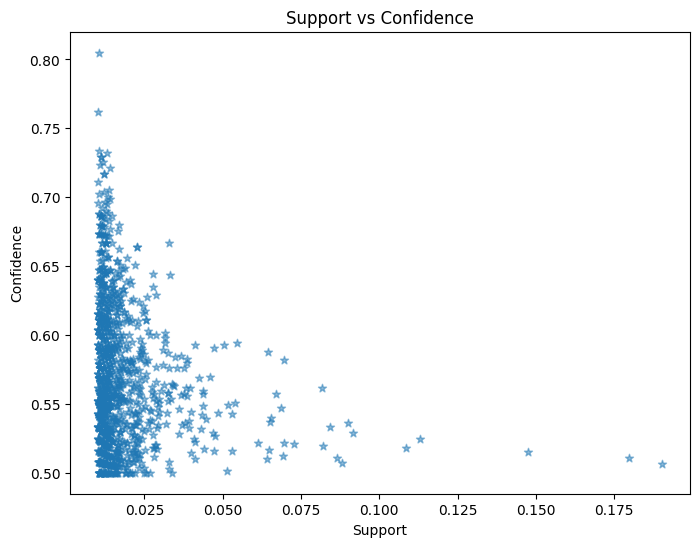

In [51]:
import seaborn as sns
import networkx as nx

# Extract support and confidence
support = rules['support'].to_numpy()
confidence = rules['confidence'].to_numpy()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [52]:
import numpy as np 

# Draw graph
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()  # Create a directed graph
    colors = np.random.rand(len(rules))
    color_map = []
    node_labels = {}

    # Build the graph with rules
    for i in range(min(rules_to_show, len(rules))):
        rule_id = f"R{i}"
        G.add_node(rule_id)  # Add a node for the rule
        node_labels[rule_id] = f"Rule {i+1}"

        # Add edges from antecedents to the rule
        for antecedent in rules.iloc[i]['antecedents']:
            G.add_node(antecedent)
            G.add_edge(antecedent, rule_id, color=colors[i], weight=2)

        # Add edges from the rule to consequents
        for consequent in rules.iloc[i]['consequents']:
            G.add_node(consequent)
            G.add_edge(rule_id, consequent, color=colors[i], weight=2)

    # Extract edge attributes for drawing
    edges = G.edges()
    edge_colors = [G[u][v]['color'] for u, v in edges]
    edge_weights = [G[u][v]['weight'] for u, v in edges]

    # Draw the graph
    pos = nx.spring_layout(G, k=16, scale=1)  # Layout for nodes
    nx.draw(G, pos, edge_color=edge_colors, width=edge_weights, with_labels=False,
            node_color="lightblue", node_size=2000)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
    plt.show()

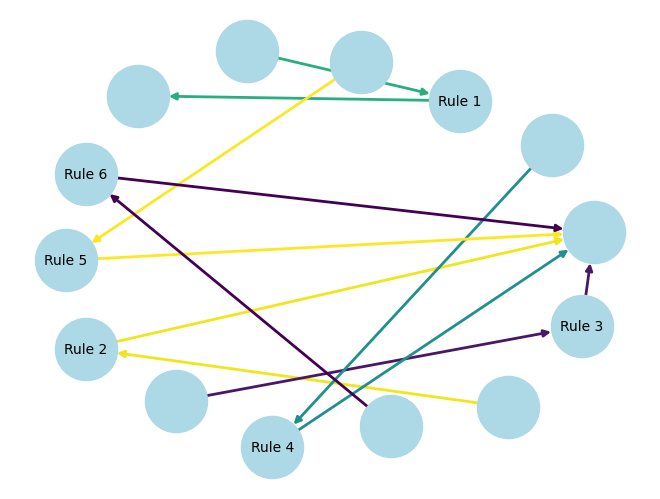

In [53]:
draw_graph(rules, 6)